https://github.com/usuyama/pydata-medical-image/blob/master/diabetic_retinopathy/scripts/preprocess.py

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv', 'train_images', 'test_images']


In [2]:
from glob import glob
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
path_list = glob('../input/train_images/*.png')[0:2]

In [3]:
def estimate_radius(img):
    mx = img[img.shape[0] // 2,:,:].sum(1)
    rx = (mx > mx.mean() / 10).sum() / 2
    my = img[:,img.shape[1] // 2,:].sum(1)
    ry = (my > my.mean() / 10).sum() / 2
    return (ry, rx)

def subtract_gaussian_blur(img):
    gb_img = cv2.GaussianBlur(img, (0, 0), 5)
    return cv2.addWeighted(img, 4, gb_img, -4, 128)

def remove_outer_circle(a, p, r):
    b = np.zeros(a.shape, dtype=np.uint8)
    cv2.circle(b, (a.shape[1] // 2, a.shape[0] // 2), int(r * p), (1, 1, 1), -1, 8, 0)
    return a * b + 128 * (1 - b)

def crop_img(img, h, w):
        h_margin = (img.shape[0] - h) // 2 if img.shape[0] > h else 0
        w_margin = (img.shape[1] - w) // 2 if img.shape[1] > w else 0
        crop_img = img[h_margin:h + h_margin,w_margin:w + w_margin,:]
        return crop_img

def place_in_square(img, r, h, w):
    new_img = np.zeros((2 * r, 2 * r, 3), dtype=np.uint8)
    new_img += 128
    new_img[r - h // 2:r - h // 2 + img.shape[0], r - w // 2:r - w // 2 + img.shape[1]] = img
    return new_img

def preprocess(f, r, debug_plot=False):
    img = cv2.imread(f)
    ry, rx = estimate_radius(img)
    resize_scale = r / max(rx, ry)
    w = min(int(rx * resize_scale * 2), r * 2)
    h = min(int(ry * resize_scale * 2), r * 2)
    img = cv2.resize(img, (0,0), fx=resize_scale, fy=resize_scale)
    img = crop_img(img, h, w)
    if debug_plot:
        plt.figure()
        plt.imshow(img)
    img = subtract_gaussian_blur(img)
    img = remove_outer_circle(img, 0.9, r)
    img = place_in_square(img, r, h, w)
    if debug_plot:
        plt.figure()
        plt.imshow(img)
    return img

    return None

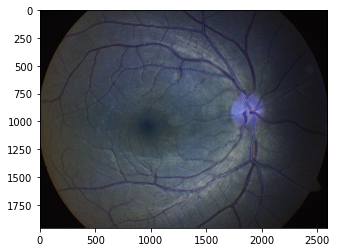

In [4]:
size= 512
r=size//2
path0 = path_list[0]
img = cv2.imread(path0)
plt.imshow(img)

In [5]:
ry, rx = estimate_radius(img)
resize_scale = r / max(rx, ry)
w = min(int(rx * resize_scale * 2), r*2)
h = min(int(ry * resize_scale * 2), r*2)
img = cv2.resize(img, (0,0), fx=resize_scale, fy=resize_scale)
ry,rx,resize_scale,img.shape

(979.0, 1294.0, 0.19783616692426584, (387, 512, 3))

In [6]:
img = crop_img(img, h, w)
img.shape

(387, 512, 3)

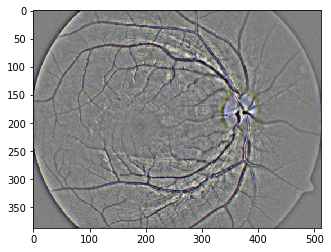

In [7]:
img = subtract_gaussian_blur(img)
plt.imshow(img)

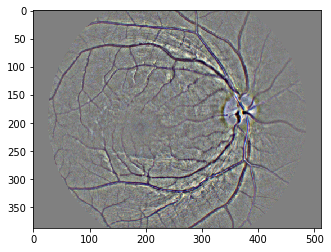

In [8]:
img = remove_outer_circle(img, 0.9, r)
plt.imshow(img)

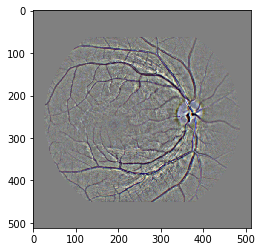

In [9]:
img = place_in_square(img, r, h, w)
plt.imshow(img)